<a href="https://colab.research.google.com/github/yahdiindrawan/covid19-forecasting-system/blob/master/Bidirectional_LSTM_Recovered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# univariate bidirectional lstm example
from numpy import array
from matplotlib import pyplot as plt
import pandas as pd 
import tensorflow as tf

In [0]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

           Confrimed  Death  Recovered  Active
Date                                          
1/22/2020        555     17         28     510
1/23/2020        653     18         30     605
1/24/2020        941     26         36     879
1/25/2020       1434     42         39    1353
1/26/2020       2118     56         52    2010


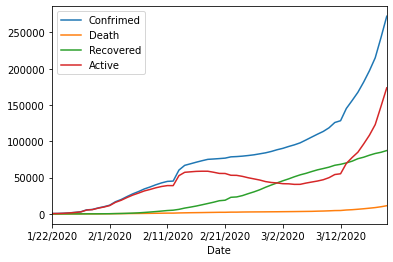

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/KadhReyA/covid19-forecasting-system/master_copy/Dataset/time_series_covid_19.csv', index_col='Date')
print(df.head())
df.plot()

In [50]:
raw_seq = []
for i in range(len(df.Recovered)):
  raw_seq.append(df.Recovered[i])
print(raw_seq)

[28, 30, 36, 39, 52, 61, 107, 126, 143, 222, 284, 472, 623, 852, 1124, 1487, 2011, 2616, 3244, 3946, 4683, 5150, 6295, 8058, 9395, 10865, 12583, 14352, 16121, 18177, 18890, 22886, 23394, 25227, 27905, 30384, 33277, 36711, 39782, 42716, 45602, 48228, 51170, 53796, 55865, 58358, 60694, 62494, 64404, 67003, 68324, 70251, 72624, 76034, 78088, 80840, 83207, 84854, 87256]


In [0]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [52]:
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [53]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [54]:
length = len(raw_seq)
x_input = array([raw_seq[length-3], raw_seq[length-2], raw_seq[length-1]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat[0][0])

94721.14


In [55]:
last_recovered = raw_seq[length-1]
predict = yhat
print(last_recovered)
print(predict)

87256
[[94721.14]]


In [56]:
# Recovered per Day
increase = []
for i in range(len(df.Recovered)-1):
  increase.append(df.Recovered[i+1]-df.Recovered[i])
print(increase)
increased_pred = predict - last_recovered
print(increased_pred)

[2, 6, 3, 13, 9, 46, 19, 17, 79, 62, 188, 151, 229, 272, 363, 524, 605, 628, 702, 737, 467, 1145, 1763, 1337, 1470, 1718, 1769, 1769, 2056, 713, 3996, 508, 1833, 2678, 2479, 2893, 3434, 3071, 2934, 2886, 2626, 2942, 2626, 2069, 2493, 2336, 1800, 1910, 2599, 1321, 1927, 2373, 3410, 2054, 2752, 2367, 1647, 2402]
[[7465.140625]]


In [0]:
result_bidirectional = []
for i in range(len(df.Recovered)-2):
  x_input = array([df.Recovered[i], df.Recovered[i+1], df.Recovered[i+2]])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  result_bidirectional.append(yhat[0][0])

In [62]:
# define Stacked LSTM Model
model_stacked = tf.keras.Sequential()
model_stacked.add(tf.keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_stacked.add(tf.keras.layers.LSTM(50, activation='relu'))
model_stacked.add(tf.keras.layers.Dense(1))
model_stacked.compile(optimizer='adam', loss='mse')

In [63]:
# fit stacked lstm model
model_stacked.fit(X, y, epochs=200, verbose=0)

In [64]:
result_stacked = []
for i in range(len(df.Recovered)-2):
  x_input = array([df.Recovered[i], df.Recovered[i+1], df.Recovered[i+2]])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model_stacked.predict(x_input, verbose=0)
  result_stacked.append(yhat[0][0])
print(result_stacked)
print(result_bidirectional)
print(len(df.Recovered[2:]))
print(len(result_bidirectional))
print(len(result_stacked))

[42.916454, 48.30601, 64.079155, 84.32163, 93.97085, 77.28923, 106.478714, 128.61684, 153.54303, 243.50383, 330.27905, 576.6845, 783.8264, 1069.1615, 1430.3882, 1912.0188, 2578.7095, 3292.239, 4033.5818, 4787.5186, 5551.26, 6264.8564, 8025.0195, 9760.581, 11334.195, 13086.517, 15002.05, 16986.938, 18895.045, 20912.71, 22919.738, 25684.064, 27048.543, 29475.674, 32374.213, 35390.195, 38802.09, 42370.242, 45669.082, 48834.164, 51916.11, 54923.98, 57917.363, 60574.02, 63047.617, 65632.88, 67938.05, 70069.92, 72351.04, 74628.555, 76457.79, 78952.22, 81912.52, 85053.86, 87621.8, 90347.805, 92680.95]
[44.862114, 48.597515, 60.99142, 69.27355, 113.5724, 123.76726, 152.75418, 229.70743, 254.33742, 427.8737, 517.22546, 738.3875, 958.8005, 1273.181, 1702.1312, 2244.8977, 2895.6008, 3609.5205, 4374.8125, 5094.5386, 5930.212, 7158.8716, 8759.076, 10442.35, 12109.257, 13946.862, 15895.6875, 17955.62, 19736.371, 22042.188, 24215.094, 26466.594, 28300.373, 30912.252, 33879.457, 37074.08, 40637.633, 4

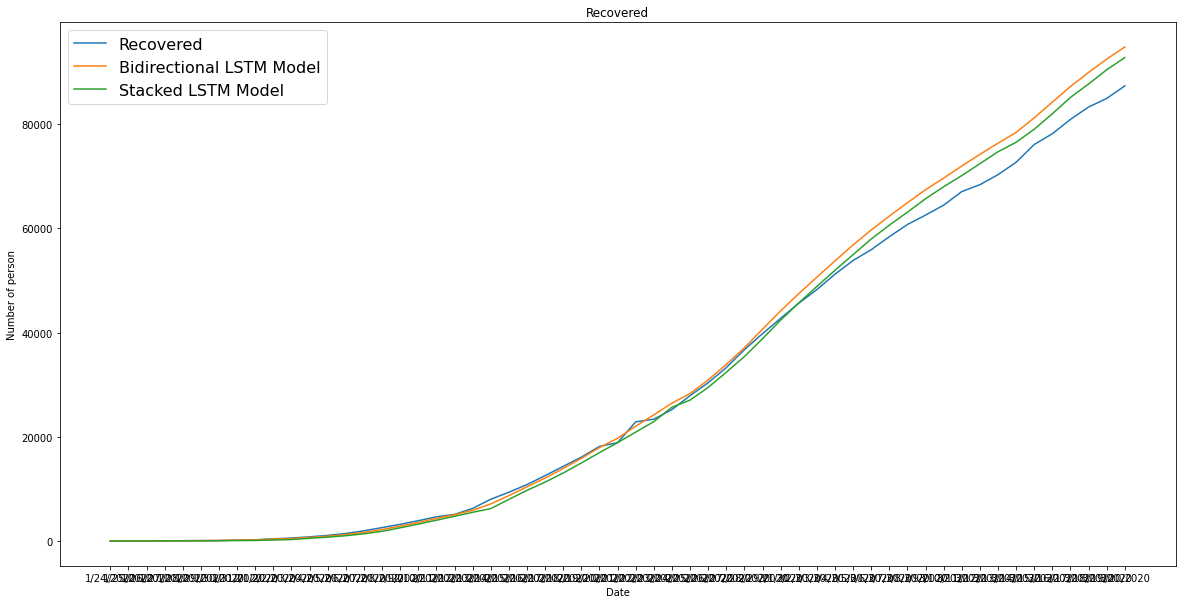

In [72]:
plt.figure(figsize=(20,10))
plt.title('Recovered')
plt.xlabel('Date')
plt.ylabel('Number of person')
plt.plot(df.Recovered[2:])
plt.plot(result_bidirectional)
plt.plot(result_stacked)
plt.legend(('Recovered', 'Bidirectional LSTM Model', 'Stacked LSTM Model'), loc='best',shadow=False, fontsize=16)
plt.show()